In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing


df = pd.read_csv('wine_data.csv', header=None, usecols=[1,2])
df.columns=['Alcohol', 'Malic acid']
df.head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [2]:
df.describe()

,Alcohol,Malic acid
count,178.000000,178.000000
mean,13.000618,2.336348
std,0.811827,1.117146
min,11.030000,0.740000
25%,12.362500,1.602500
50%,13.050000,1.865000
75%,13.677500,3.082500
max,14.830000,5.800000


# Visualization before Normalization

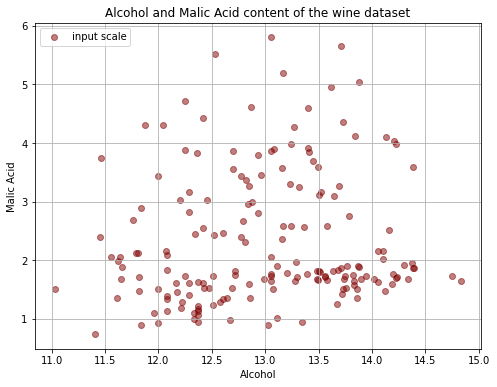

In [3]:
plt.figure(figsize=(8,6))

plt.scatter(df['Alcohol'], df['Malic acid'],
        color='maroon', label='input scale', alpha=0.5)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.show()

# StandardScaler

In [4]:
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

In [5]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


# MinMaxScaler

In [6]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [7]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


# Visualization after Normalization

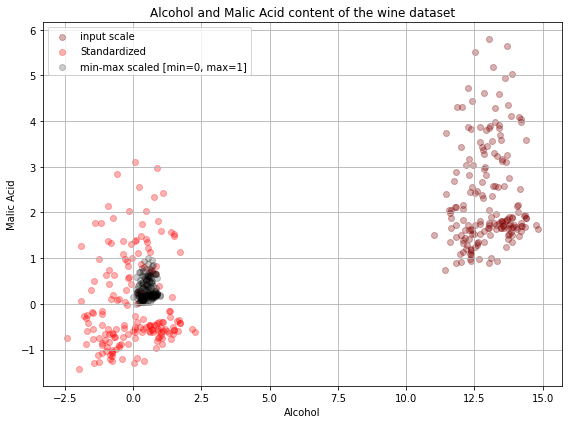

In [8]:
plt.figure(figsize=(8,6))

plt.scatter(df['Alcohol'], df['Malic acid'],
        color='maroon', label='input scale', alpha=0.3)

plt.scatter(df_std[:,0], df_std[:,1], color='red',
        label='Standardized', alpha=0.3)

plt.scatter(df_minmax[:,0], df_minmax[:,1],
        color='black', label='min-max scaled [min=0, max=1]', alpha=0.2)

plt.title('Alcohol and Malic Acid content of the wine dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()

plt.show()

In [ ]:
df_std[:,0].mean()

In [ ]:
df_minmax[:,0].max()

# Simple Python

In [12]:

x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

print('Standard Scaler\n', z_scores)

# Min-Max scaling

minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]

print('MinMax Scaler\n', minmax)

Standard Scaler
 [-1.5811388300841895, 0.07905694150420944, 0.6324555320336758, 1.185854122563142, 1.185854122563142, -1.0277402395547233, -0.4743416490252569]
MinMax Scaler
 [0.0, 0.6, 0.8, 1.0, 1.0, 0.2, 0.4]


# Using Numpy

In [13]:
# Standardization

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

print(z_scores_np)

# Min-Max scaling

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

print(np_minmax)

[-1.58113883  0.07905694  0.63245553  1.18585412  1.18585412 -1.02774024
 -0.47434165]
[0.  0.6 0.8 1.  1.  0.2 0.4]
